In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import SMOTE

In [21]:
df = pd.read_csv('Final_cleaned_data.csv')
df.head()

,ISBN,Publisher,Book_Title,Book_Author,First_Publish_Year,Edition_Count,Book_Age,Edition_Count_Category,Total_Reviews,No_of_Pages,Book_Length_Category,Popularity_Score,Book_Price,Bestseller
0,1881320189,River City Pub,Goodbye to the Buttermilk Sky,Julia Oliver,1994,1,33,Low,189,363,Medium,113.8,32.15,1
1,0440295734,Bantam Books,The Testament,John Grisham,1999,62,26,High,588,474,Medium,377.6,37.70,1
2,0553502271,Random House Audio,The Testament,John Grisham,1999,61,26,High,8,116,Short,29.2,5.80,0
3,0439095026,Scholastic,Tell Me This Isn't Happening,Robynn Clairday,1999,1,26,Low,165,440,Medium,99.4,32.00,1
4,0060168013,Harpercollins,Pigs in Heaven,Barbara Kingsolver,1993,13,32,Medium,88,451,Medium,58.0,38.55,1


In [23]:
numerical_cols = ['Edition_Count', 'Book_Age', 
                  'Total_Reviews', 'No_of_Pages', 'Popularity_Score', 'Book_Price']
X = df[numerical_cols]
y = df['Bestseller']

In [25]:
print("Data before scaling:")
print(X.head())

Data before scaling:
   Edition_Count  Book_Age  Total_Reviews  No_of_Pages  Popularity_Score  \
0              1        33            189          363             113.8   
1             62        26            588          474             377.6   
2             61        26              8          116              29.2   
3              1        26            165          440              99.4   
4             13        32             88          451              58.0   

   Book_Price  
0       32.15  
1       37.70  
2        5.80  
3       32.00  
4       38.55  


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
print("\nData after scaling:")
print(pd.DataFrame(X_scaled, columns=numerical_cols).head())


Data after scaling:
   Edition_Count  Book_Age  Total_Reviews  No_of_Pages  Popularity_Score  \
0      -0.541913  0.522196      -0.780446    -0.796531         -0.811208   
1       2.590821 -0.428635       0.929033    -0.362116          1.074135   
2       2.539465 -0.428635      -1.555923    -1.763203         -1.415833   
3      -0.541913 -0.428635      -0.883271    -0.495180         -0.914123   
4       0.074362  0.386363      -1.213171    -0.452130         -1.210003   

   Book_Price  
0   -0.729043  
1   -0.328395  
2   -2.631221  
3   -0.739872  
4   -0.267035  


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [33]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [35]:
print("\nTrain Dataset :")
print(pd.DataFrame(X_train_resampled, columns=numerical_cols).head())


Train Dataset :
   Edition_Count  Book_Age  Total_Reviews  No_of_Pages  Popularity_Score  \
0      -0.387844 -0.428635       1.665951    -1.751462          1.645884   
1       7.058820  5.955516       0.123564    -0.315152          0.516679   
2      -0.490557  0.386363       0.020738    -0.448216         -0.006471   
3      -0.233776 -0.700300       0.671968    -0.276015          0.659617   
4      -0.285132 -0.700300       0.877620     1.199431          0.862587   

   Book_Price  
0   -1.465370  
1   -0.140704  
2   -0.263425  
3   -0.104610  
4    1.400529  


In [37]:
print("\nTest Dataset:")
print(pd.DataFrame(X_test, columns=numerical_cols).head())


Test Dataset:
   Edition_Count  Book_Age  Total_Reviews  No_of_Pages  Popularity_Score  \
0      -0.541913 -0.700300       1.108978     1.598624          1.079852   
1      -0.439201  0.793862      -0.300592    -0.945250         -0.325221   
2       0.536569 -0.292802      -1.418822     1.508610         -1.390104   
3      -0.541913  2.288025       0.509161     0.800239          0.479516   
4      -0.541913 -0.156969       0.290656    -0.385597          0.255104   

   Book_Price  
0    1.913070  
1   -0.866202  
2    0.386275  
3    0.454854  
4   -0.494430  



Results for POLYNOMIAL Kernel
Cost (C=0.01): Accuracy = 0.9604
Cost (C=0.1): Accuracy = 0.9571
Cost (C=1): Accuracy = 0.9538


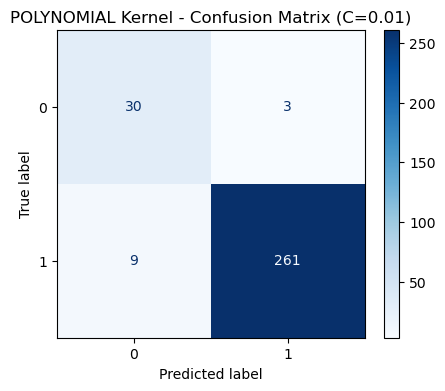

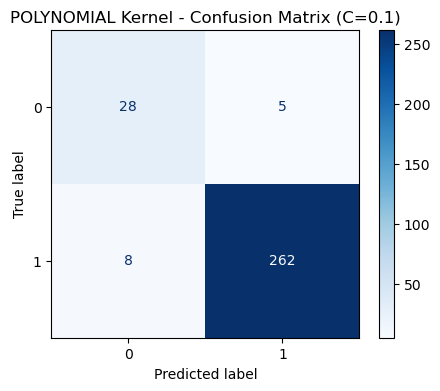

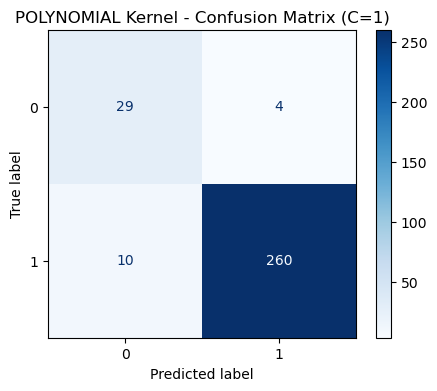

In [39]:
# Polynomial Kernel
print("\n" + "="*50)
print("Results for POLYNOMIAL Kernel")
print("="*50)

costs = [0.01, 0.1, 1]
poly_conf_matrices = []

for C in costs:
    model_poly = svm.SVC(kernel='poly', C=C, random_state=42)
    model_poly.fit(X_train_resampled, y_train_resampled)
    y_pred_poly = model_poly.predict(X_test)

    cm_poly = confusion_matrix(y_test, y_pred_poly)
    acc_poly = accuracy_score(y_test, y_pred_poly)

    print(f"Cost (C={C}): Accuracy = {acc_poly:.4f}")
    poly_conf_matrices.append((cm_poly, model_poly.classes_, C))

# Plot Confusion Matrices for Polynomial Kernel
for cm, labels, C in poly_conf_matrices:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(5, 4))
    disp.plot(cmap="Blues", ax=ax)
    plt.title(f"POLYNOMIAL Kernel - Confusion Matrix (C={C})")
    plt.grid(False)
    plt.show()



Results for RBF Kernel
Cost (C=0.01): Accuracy = 0.8581
Cost (C=0.1): Accuracy = 0.9538
Cost (C=1): Accuracy = 0.9505


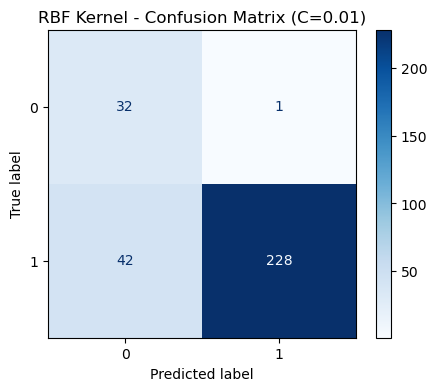

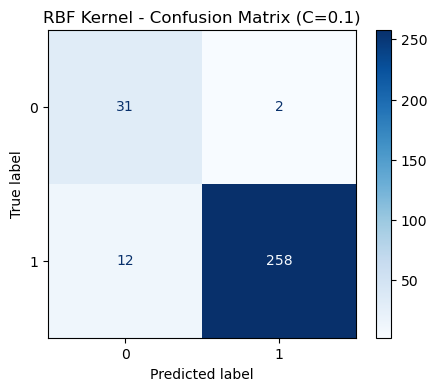

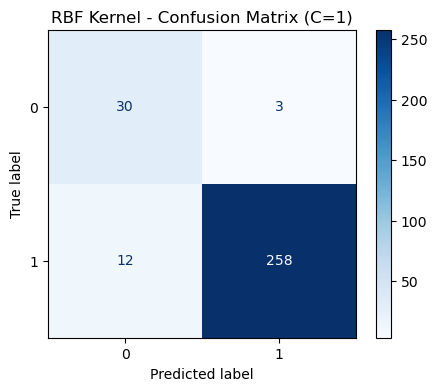

In [41]:
# RBF Kernel
print("\n" + "="*50)
print("Results for RBF Kernel")
print("="*50)

costs = [0.01, 0.1, 1]
rbf_conf_matrices = []

for C in costs:
    model_rbf = svm.SVC(kernel='rbf', C=C, random_state=42)
    model_rbf.fit(X_train_resampled, y_train_resampled)
    y_pred_rbf = model_rbf.predict(X_test)

    cm_rbf = confusion_matrix(y_test, y_pred_rbf)
    acc_rbf = accuracy_score(y_test, y_pred_rbf)

    print(f"Cost (C={C}): Accuracy = {acc_rbf:.4f}")
    rbf_conf_matrices.append((cm_rbf, model_rbf.classes_, C))

# Plot Confusion Matrices for RBF Kernel
for cm, labels, C in rbf_conf_matrices:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(5, 4))
    disp.plot(cmap="Blues", ax=ax)
    plt.title(f"RBF Kernel - Confusion Matrix (C={C})")
    plt.grid(False)
    plt.show()



Results for SIGMOID Kernel
Cost (C=0.01): Accuracy = 0.7624
Cost (C=0.1): Accuracy = 0.8350
Cost (C=1): Accuracy = 0.8119


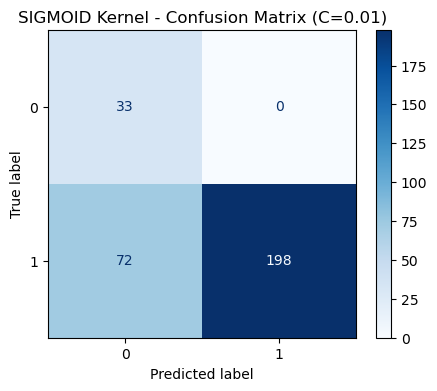

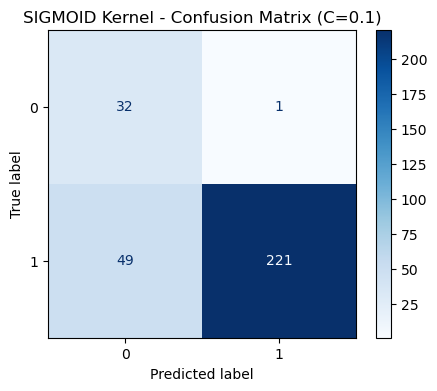

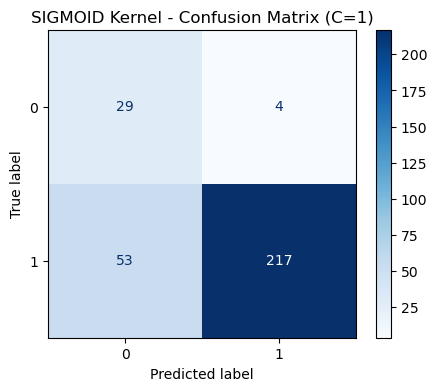

In [43]:
# Sigmoid Kernel
print("\n" + "="*50)
print("Results for SIGMOID Kernel")
print("="*50)

costs = [0.01, 0.1, 1]
sigmoid_conf_matrices = []

for C in costs:
    model_sigmoid = svm.SVC(kernel='sigmoid', C=C, random_state=42)
    model_sigmoid.fit(X_train_resampled, y_train_resampled)
    y_pred_sigmoid = model_sigmoid.predict(X_test)

    cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
    acc_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

    print(f"Cost (C={C}): Accuracy = {acc_sigmoid:.4f}")
    sigmoid_conf_matrices.append((cm_sigmoid, model_sigmoid.classes_, C))

# Plot Confusion Matrices for Sigmoid Kernel
for cm, labels, C in sigmoid_conf_matrices:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(5, 4))
    disp.plot(cmap="Blues", ax=ax)
    plt.title(f"SIGMOID Kernel - Confusion Matrix (C={C})")
    plt.grid(False)
    plt.show()


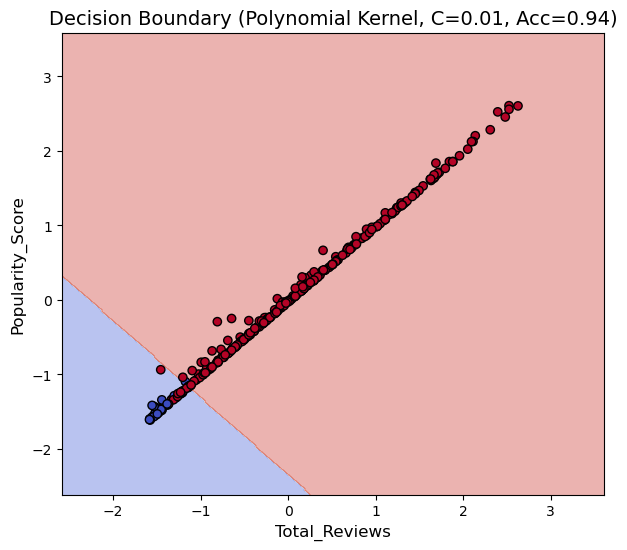

In [60]:
selected_features = ['Total_Reviews', 'Popularity_Score']
X_vis = df[selected_features]
y_vis = df['Bestseller']

scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y_vis, test_size=0.3, random_state=42)

smote_vis = SMOTE(random_state=42)
X_train_vis_resampled, y_train_vis_resampled = smote_vis.fit_resample(X_train_vis, y_train_vis)

# 5. Define the function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Total_Reviews', fontsize=12)
    plt.ylabel('Popularity_Score', fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()

# 6. Train and plot for best Polynomial model
best_acc_poly = 0
best_c_poly = None
best_model_poly = None

for C in [0.01, 0.1, 1]:
    model_poly = svm.SVC(kernel='poly', C=C, random_state=42)
    model_poly.fit(X_train_vis_resampled, y_train_vis_resampled)
    y_pred_poly = model_poly.predict(X_test_vis)
    acc_poly = accuracy_score(y_test_vis, y_pred_poly)

    if acc_poly > best_acc_poly:
        best_acc_poly = acc_poly
        best_c_poly = C
        best_model_poly = model_poly

plot_decision_boundary(X_test_vis, y_test_vis, best_model_poly,
                       f"Decision Boundary (Polynomial Kernel, C={best_c_poly}, Acc={best_acc_poly:.2f})")


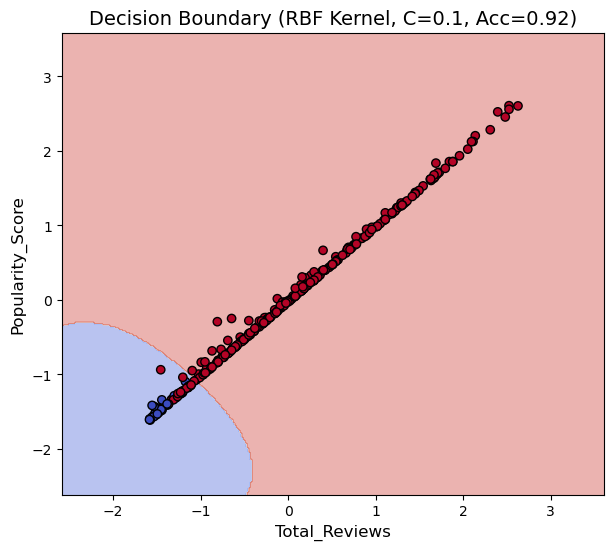

In [62]:
# 7. Train and plot for best RBF model
best_acc_rbf = 0
best_c_rbf = None
best_model_rbf = None

for C in [0.01, 0.1, 1]:
    model_rbf = svm.SVC(kernel='rbf', C=C, random_state=42)
    model_rbf.fit(X_train_vis_resampled, y_train_vis_resampled)
    y_pred_rbf = model_rbf.predict(X_test_vis)
    acc_rbf = accuracy_score(y_test_vis, y_pred_rbf)

    if acc_rbf > best_acc_rbf:
        best_acc_rbf = acc_rbf
        best_c_rbf = C
        best_model_rbf = model_rbf

plot_decision_boundary(X_test_vis, y_test_vis, best_model_rbf,
                       f"Decision Boundary (RBF Kernel, C={best_c_rbf}, Acc={best_acc_rbf:.2f})")


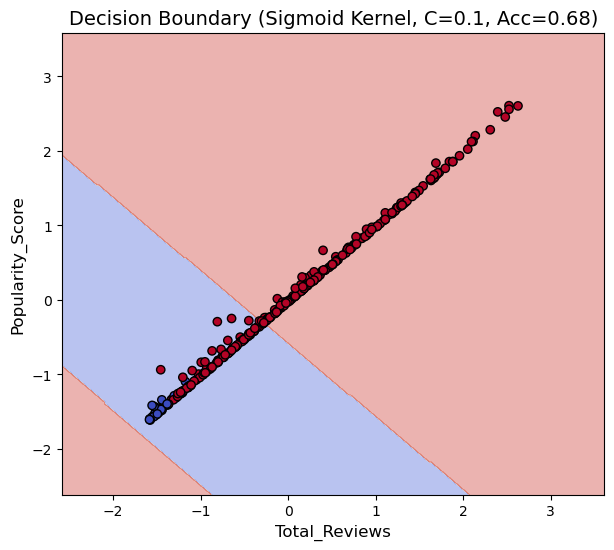

In [63]:
# 8. Train and plot for best Sigmoid model
best_acc_sigmoid = 0
best_c_sigmoid = None
best_model_sigmoid = None

for C in [0.01, 0.1, 1]:
    model_sigmoid = svm.SVC(kernel='sigmoid', C=C, random_state=42)
    model_sigmoid.fit(X_train_vis_resampled, y_train_vis_resampled)
    y_pred_sigmoid = model_sigmoid.predict(X_test_vis)
    acc_sigmoid = accuracy_score(y_test_vis, y_pred_sigmoid)

    if acc_sigmoid > best_acc_sigmoid:
        best_acc_sigmoid = acc_sigmoid
        best_c_sigmoid = C
        best_model_sigmoid = model_sigmoid

plot_decision_boundary(X_test_vis, y_test_vis, best_model_sigmoid,
                       f"Decision Boundary (Sigmoid Kernel, C={best_c_sigmoid}, Acc={best_acc_sigmoid:.2f})")
